## 딥러닝으로 시작하는 컴퓨터 비전
### 9. Segmentation

#### 9-1. 들어가며

![](./img09/01.png)
![](./img09/02.png)

#### 학습 내용

Semantic Segmentation vs. Instance Segmentation

 - Segmentation이 어떤 task 인지 이해하고 Segmentation의 종류를 나눠서 각 개념에 대해 알아봅시다.

U-Net 모델을 통해 Semantic Segmentation 이해하기

 - Segmentation 중에서도 Semantic segmentation의 목표를 알아봅시다. 또한, U-Net 모델의 구성요소를 살펴보며 Semantic Segmentation을 이해해 봅시다.

U-Net 코드를 통해서 이해 다지기

 - U-Net 모델을 직접 코드로 구현해 보고 다시 한번 Semantic Segmentation 이해하고 Encoder-Decoder 구조를 알아봅시다.

학습 목표

Segmentation의 목표를 이해하고, semantic segmentation과 instance segmentation의 차이점을 설명할 수 있습니다.

Semantic segmentation의 대표적인 모델인 U-Net 모델의 구성 요소를 설명할 수 있습니다.

#### 9-2. Semantic Segmentation vs Instance Segmentation

![](./img09/03.png)

Semantic Segmentation

 - Semantic Segmentation은 이미지에서 픽셀 단위로 분류하는 방법입니다. 이때, 같은 라벨은 같은 색으로 표시됩니다. Semantic Segmentation은 이미지에서 픽셀 단위로 분류하는 방법입니다. 이때, 같은 라벨은 같은 색으로 표시됩니다.
 - 하나의 이미지 안에 들어있는 객체의 종류를 (object category)를 픽셀 단위로 찾자

Instance Segmentation
 - Instance Segmentation은 Semantic Segmentation과 비슷하지만 같은 라벨이라도 각각 다른 색으로 표시됩니다. Semantic Segmentation은 이미지에서 픽셀 단위로 분류하는 방법입니다. 이때, 같은 라벨은 같은 색으로 표시됩니다.
 - 하나의 이미지 안에 들어있는 객체의 객체를(object instance) 픽셀 단위로 찾자

Instance Segmentation = Semantic Segmentation + distinguishing instance

두 방법 다 데이터의 크기가 매우 크기 때문에 data augmentation이 필수적입니다.(소량의 데이터로 효과적인 방법을 찾는것)

Q. Segmentation는 어떤 task 인지 설명해 보세요.

segmentation은 이미지를 픽셀 단위로 나누어서 특정 픽셀이 무엇을 지칭하는지를 파악하는 task 입니다.


Q. Segmentation의 종류는 Semantic Segmentation과 Instance Segmentation으로 나눌 수 있습니다. 어떤 차이가 있는지 각 개념을 설명해 보세요.

semantic segmentation은 하나의 이미지 안에 들어있는 객체의 종류(object category)를 픽셀 단위로 찾습니다. 반면 instance segmentation은 하나의 이미지 안에 들어있는 객체의 개체(object instance)를 픽셀 단위로 찾습니다.

어떤 Segmentation 종류이든 이미지 데이터를 segmentation 모델 학습에 사용하기 위해서는 픽셀 하나하나 labeling을 해줘야 하기 때문에 데이터셋 구축이 어렵고, 따라서 data augmentation이 매우 중요합니다.

#### 9-3. U-Net 구조를 통해서 Segmentation 이해하기

![](./img09/04.png)

Semantic Segmentation의 목표는 정답값(label)을 맞추는 것

의료 데이터의 경우 정상과 비정상 2개로 나뉠수 있다. 하지만 예시의 경우 라벨값이 2개 이상일 경우 1부터 5까지 표시됨

라벨을 픽셀단위로 Class를 픽셀단위로 분류하는 것이 Semantic Segmentation의 목표

![](./img09/05.png)

정답은 위와 같이 구성되어 있다. (0과 1의 Binary Encoding으로 구성되어 있다)



![](./img09/06.png)

여러개의 인풋을 가진 채널 존재. 아웃풋은 강우량(양의 실수)

이것은 regression task로 U-Net은 regression task도 수행 가!


![](./img09/07.png)

Transpoesd Convolution(Encorder, Decorder)에 skip Connection을 추가한 구조가 U-Net

Skip Connection은 ResNet에서 처음 등장했고, U-Net에서도 사용되었다 (ResNet은 Classification을 위한 모델, Gradient HighWay)

![](./img09/08.png)

Up conv = Transposed Convolution

3*3+Relu conv을 연달아 2번 진행

회색 화살표의 Crop and Copy 의미 : Down sampling (U를 반으로 잘랐을때 왼쪽편)에서 그림 상 점선의 값이 오른편으로 이동한다.

ex) 세번째 층 외편의 점선을 보면 점선의 값이 그대로 오른편으로 이동하게 된다.

피쳐맵의 전체를 사용하는게 아니라 136^2에서 104^2만 잘라내서(crop) 오른편의 동일층에 붙인다(concat)

![](./img09/09.png)

U-Net의 왼편은 Encoder(압축)만 가지고 Semantic Segmentation을 수행할 수 없다.

이미지 위치에 대한 정보가 점점 소실되기 때문


![](./img09/10.png)

압축된 이미지를 High Resolution으로 복원

대부분의 semantic segmentation 인풋사이즈와 아웃풋 사이즈가 동일하지만 U-Net은 아웃풋이 더 작다

![](./img09/11.png)

Concat을 통해 인코딩 과정에서의 정보 손실을 보충한다.

Q. 앞에서 Segmentation의 종류 2가지를 배웠습니다. 그중에서 Semantic segmentation의 목표는 무엇인지 설명해 보세요.

Semantic segmentation의 목표는 이미지가 주어졌을 때, 픽셀 단위로 Classification을 수행하여 이미지와 동일한 높이와 너비를 가진 Segmentation map을 생성하는 것입니다.

Q. U-Net 모델은 Encoder-Decoder 모델에 skip connection을 추가한 모델이라고 할 수 있습니다. U-Net 모델 구조 중 Encoder에 해당하는 Contracting path 부분의 특징을 설명해 보세요.

convolution 연산으로 이루어진 부분이며 CNN 구조와 유사하다는 특징이 있습니다. 또한 3x3 kernel을 사용하는 VGG 모델과 매우 유사하며 입력 이미지가 가지고 있는 context 정보를 추출합니다. U-Net 모델 구조 중 Encoder에 해당하며 convolution 연산을 하기 때문에 이미지의 위치에 대한 정보가 차츰 사라집니다.

Q. U-Net 모델 구조 중 Decoder에 해당하는 Expanding (Expansive) path 부분의 특징을 설명해 보세요.

up-convolution 연산으로 이루어진 부분이며 low resolution의 latent representation을 high resolution으로 변형합니다. 또한 Encoder 부분인 contracting path에서 만들어진 feature map을 cropping 한 결과물이 concatenation 됩니다. U-Net 모델 구조 중 Decoder에 해당하며 up-convolution 연산을 하기 때문에 원본 이미지가 가지고 있었던 위치 정보가 복원됩니다.

Q. U-Net 모델은 Encoding 부분에서 이미지를 압축하며 정보의 손실이 발생합니다. 이를 보완하기 위해 어떤 방법을 사용하는지, 그 방법의 특징은 무엇인 설명해 보세요.

Encoding 과정에서의 정보 손실을 보충하기 위해 skip connection을 사용합니다. 이것은 Decoding 단계에서, 저차원의 정보와 고차원의 정보도 함께 이용하기 위한 방법입니다.

#### 9-4. U-Net 코드를 통해서 이해 다지기

U-Net 모델의 코드를 보면서 구조를 이해해봅시다.
먼저 시각화에 필요한 라이브러리들을 설치하고 필요한 라이브러리를 불러옵니다.

In [7]:
!pip install graphviz
!pip install pydot

In [8]:
import tensorflow.keras.layers as layers
import tensorflow as tf

U-Net 모델을 구현한 코드입니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/cv-b-9-4-1.max-800x600.png)

![](https://d3s0tskafalll9.cloudfront.net/media/images/cv-b-9-4-2.max-800x600.png)

In [9]:
inputs = layers.Input(shape=(572, 572, 1))

# Contracting path 시작
# [1]
conv0 = layers.Conv2D(64, activation='relu', kernel_size = 3)(inputs)
conv1 = layers.Conv2D(64, activation='relu', kernel_size=3)(conv0)  # Skip connection으로 Expanding path로 이어질 예정
conv2 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv1)


# Q.위 이미지를 보고 [2]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
conv3 = layers.Conv2D(128, activation='relu', kernel_size=3)(conv2)
conv4 = layers.Conv2D(128, activation='relu', kernel_size=3)(conv3)
conv5 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv4)


# Q.위 이미지를 보고 [3]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
conv6 = layers.Conv2D(256, activation='relu', kernel_size=3)(conv5)
conv7 = layers.Conv2D(256, activation='relu', kernel_size=3)(conv6)
conv8 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv7)


# Q.위 이미지를 보고 [4]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
conv9 = layers.Conv2D(512, activation='relu', kernel_size=3)(conv8)
conv10 = layers.Conv2D(512, activation='relu', kernel_size=3)(conv9)
conv11 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv10)


# [5]
conv12 = layers.Conv2D(1024, activation='relu', kernel_size=3)(conv11)
conv13 = layers.Conv2D(1024, activation='relu', kernel_size=3)(conv12)
# Contracting path 끝

# Expanding path 시작
# [6]
trans01 = layers.Conv2DTranspose(512, kernel_size=2, strides=(2, 2), activation='relu')(conv13)
crop01 = layers.Cropping2D(cropping=(4, 4))(conv10)
concat01 = layers.concatenate([trans01, crop01], axis=-1)

# [7]
conv14 = layers.Conv2D(512, activation='relu', kernel_size=3)(concat01)
conv15 = layers.Conv2D(512, activation='relu', kernel_size=3)(conv14)
trans02 = layers.Conv2DTranspose(256, kernel_size=2, strides=(2, 2), activation='relu')(conv15)

# [8]
crop02 = layers.Cropping2D(cropping=(16, 16))(conv7)
concat02 = layers.concatenate([trans02, crop02], axis=-1)


# Q.위 이미지를 보고 [9]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
conv16 = layers.Conv2D(256, activation='relu', kernel_size=3)(concat02)
conv17 = layers.Conv2D(256, activation='relu', kernel_size=3)(conv16)
trans03 = layers.Conv2DTranspose(128, kernel_size=2, strides=(2, 2), activation='relu')(conv17)


# Q.위 이미지를 보고 [10]번 블럭을 구현해 봅시다. (cropping=(40, 40))
crop03 = layers.Cropping2D(cropping=(40, 40))(conv4)
concat03 = layers.concatenate([trans03, crop03], axis=-1)


# Q.위 이미지를 보고 [11]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
conv18 = layers.Conv2D(128, activation='relu', kernel_size=3)(concat03)
conv19 = layers.Conv2D(128, activation='relu', kernel_size=3)(conv18)
trans04 = layers.Conv2DTranspose(64, kernel_size=2, strides=(2, 2), activation='relu')(conv19)


# Q.위 이미지를 보고 [12]번 블럭을 구현해 봅시다. (cropping=(88, 88))
crop04 = layers.Cropping2D(cropping=(88, 88))(conv1)
concat04 = layers.concatenate([trans04, crop04], axis=-1)


# [13]
conv20 = layers.Conv2D(64, activation='relu', kernel_size=3)(concat04)
conv21 = layers.Conv2D(64, activation='relu', kernel_size=3)(conv20)
# Expanding path 끝

outputs = layers.Conv2D(2, kernel_size=1)(conv21)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="u-netmodel")

In [10]:
model.summary()

Model: "u-netmodel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 572, 572, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 570, 570, 64  640         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_21 (Conv2D)             (None, 568, 568, 64  36928       ['conv2d_20[0][0]']              
                                )                                                        

위에서 구현한 U-Net 모델의 구조를 그림으로 나타낼 수 있습니다.

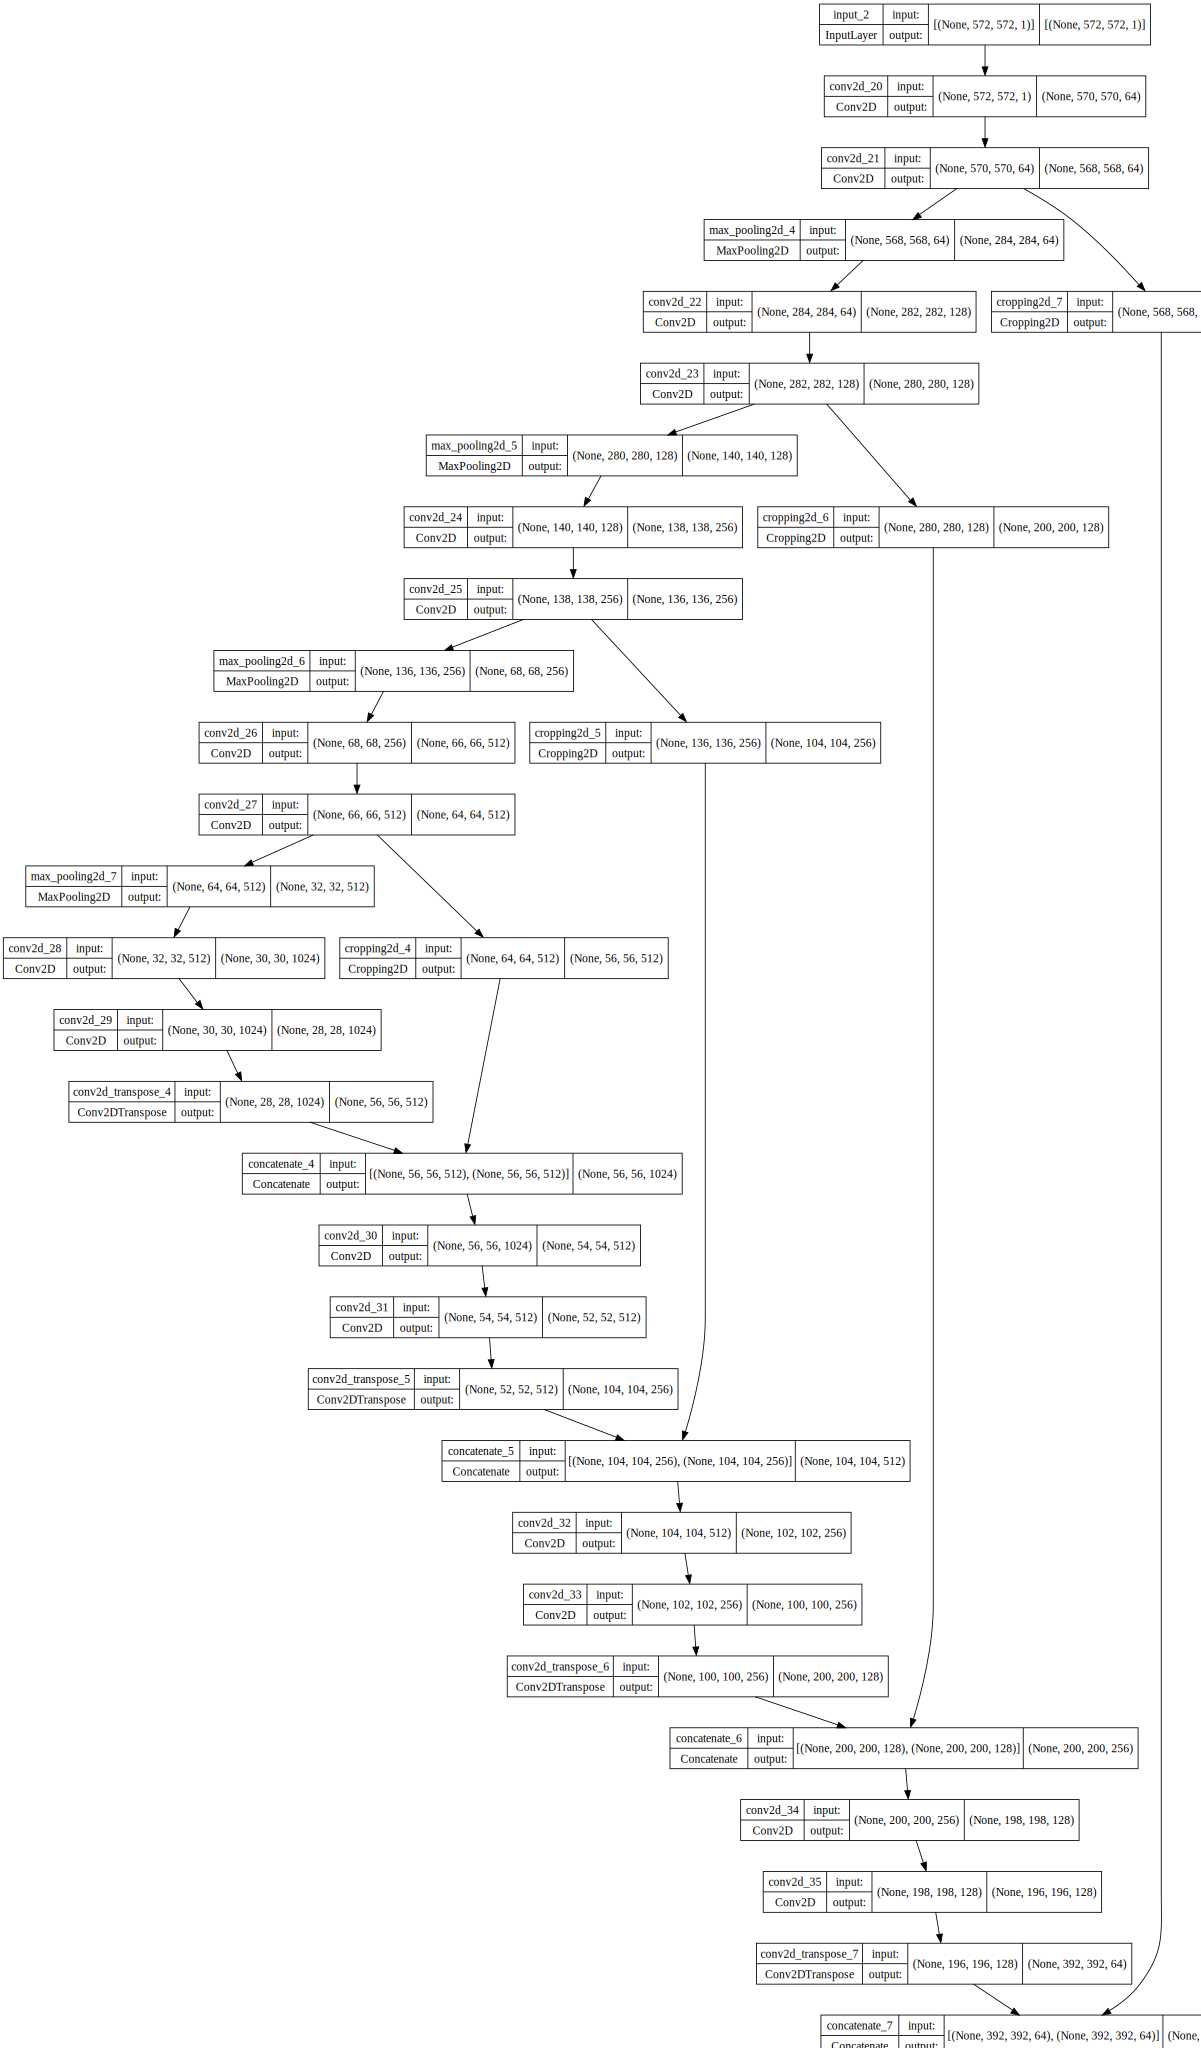

In [11]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes= True, show_layer_names=True, dpi=80).create(prog='dot', format='svg'))  #dpi를 작게 하면 그래프가 커집니다.